Missing values per column:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


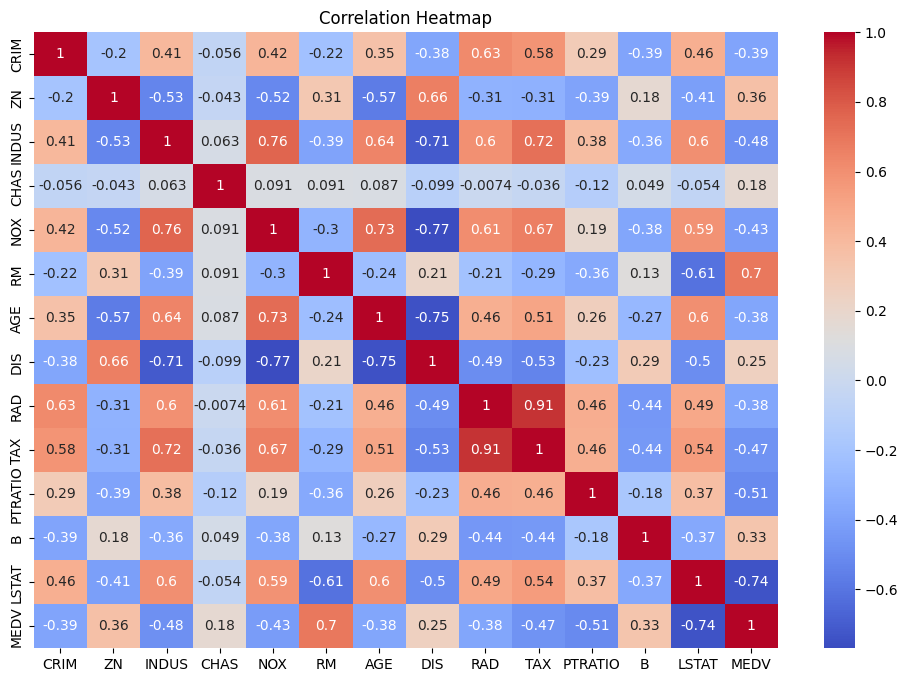

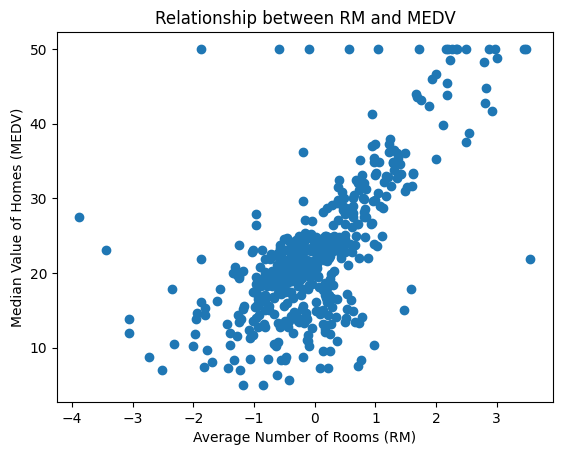

Mean Squared Error: 24.291119474973687
     Actual  Predicted
173    23.6  28.996724
274    32.4  36.025565
491    13.6  14.816944
72     22.8  25.031979
452    16.1  18.769880


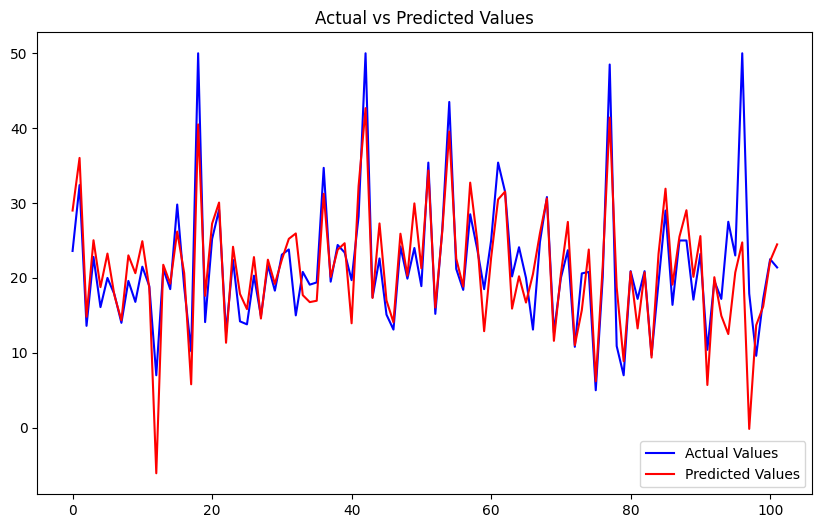

In [1]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 2: Load the dataset (assuming boston.csv is available)
df = pd.read_csv('boston.csv')

# Step 3: Handle Missing Values
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Fill missing values in numerical columns with the mean
df['RM'] = df['RM'].fillna(df['RM'].mean())
df['MEDV'] = df['MEDV'].fillna(df['MEDV'].mean())

# Fill missing values in categorical columns (if any exist) with the mode
if 'CHAS' in df.columns:  # Assume 'CHAS' is categorical
    df['CHAS'] = df['CHAS'].fillna(df['CHAS'].mode()[0])

# Step 4: Handle Categorical Values
# Use Label Encoding for binary categorical columns, like 'CHAS'
if 'CHAS' in df.columns:
    label_encoder = LabelEncoder()
    df['CHAS'] = label_encoder.fit_transform(df['CHAS'])

# If there are other categorical columns, we would use One-Hot Encoding here
# df = pd.get_dummies(df, columns=['CHAS'], drop_first=True)

# Step 5: Feature Scaling (optional, recommended for numerical columns)
scaler = StandardScaler()
numerical_cols = ['RM', 'LSTAT', 'CRIM']  # Add any numerical columns to scale

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 6: Exploratory Data Analysis (EDA)
# Display correlation heatmap to understand relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot example between two important features (e.g., RM vs. MEDV)
plt.scatter(df['RM'], df['MEDV'])
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.title('Relationship between RM and MEDV')
plt.show()

# Step 7: Split the Data into Features (X) and Target (y)
X = df.drop('MEDV', axis=1)  # Features (all columns except target 'MEDV')
y = df['MEDV']  # Target variable

# Step 8: Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 10: Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Compare the predicted and actual values (optional)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

# Plot the Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Values", color='blue')
plt.plot(y_pred, label="Predicted Values", color='red')
plt.legend()
plt.title("Actual vs Predicted Values")
plt.show()
